Imagine the whole reinforcement mechanism only as the demand function of the LearningFund.

In [7]:
%matplotlib inline

import sys, os

import numpy as np

import scipy
from scipy import optimize
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
current_palette = sns.color_palette()

In [8]:
from thurner_model import NoiseTrader, Fund, DynamicFund, find_equilibrium 
import plotting

Here, I model the fund as a learning agent, which is able to adjust its demand function over time

In [17]:
class LearningFund(Fund):
    """
    Description: Base Class is Fund, defined in thurner_model.py
    The Learning Fund learns its demand function via reinforcement learning
    """
    
    def __init__(self):
        # The learning fund does not need a beta
        self.cash = self.initial_wealth
        self.shares = 0 
        self.activation_delay = 0
    
    def get_demand(self, p_t): # this needs to be a function of p_t for the market clearing to work
        """
        oh look, a docstring
        """ 
        state = np.Array([p_t,
                          self.get_wealth(p_t), 
                          self.cash,
                          self.shares,
                          self.activation_delay]) 
        
        return policy_estimator.predict(state)

In [40]:
class Env:
    """
    Docstring
    """
    # Define our fundamental value V and asset-supply N
    V = 1.
    N = 1000.
    
    initial_price = 1.
    
    # Define noise trader (uses the NoiseTrader Class defined in thurner_model.py)
    roh_nt = 0.99
    sigma_nt = 0.035
    noise_trader = NoiseTrader(roh_nt, sigma_nt, V, N)
    initial_nt_spending = V*N
    
    def __init__(self):
        # tracks trader spending
        
        self.p_t = self.initial_price
        self.xi_t = self.initial_nt_spending
        self.done = False 
        
    # when resetting the environment, we set the state back to the initial one 
    def reset(self):
        self.p_t = self.initial_price
        self.xi_t = self.initial_nt_spending

    def step(self, funds):
        """Finds equilibrium, and updates environment parameters""" 
        # track the old price for the investor mechanism
        p_tm1 = self.p_t
        
        # 1. Find the new price for the timestep
        self.xi_t = self.noise_trader.cash_spending(self.xi_t)
        self.p_t = find_equilibrium(self.xi_t, funds)
    
        # 2. update the holdings of all the funds (wealth, shares and cash)
        current_wealth = []
        
        for fund in funds:
            fund.update_holdings(self.p_t)
            fund.check_and_make_bankrupt(self.p_t)
            
            fund.process_inflows(p_tm1, self.p_t)
            
            new_wealth_of_fund = fund.get_wealth(self.p_t)
            current_wealth.append(new_wealth_of_fund)
            
            # set done to True if one fund increases its wealth 50-fold
            if new_wealth_of_fund > 50*fund.initial_wealth:
                self.done = True
                
        return current_wealth

In [41]:

env.reset()
for t in itertools.count():
    #take a step in the environment
    current_wealth = env.step(funds)
    
    # record the current price and wealth of all funds
    prices.append(env.p_t)
    funds_wealth.append(current_wealth)
    
    if t%1000 == 0:
        print(env.done)
    
    if env.done:
        break

[ 1.02033566  2.          2.          0.          0.        ]
False
[ 0.99111104  2.          2.          0.          0.        ]
[ 0.99691181  2.          2.          0.          0.        ]
[ 1.01612654  2.          2.          0.          0.        ]
[ 1.01447804  2.          2.          0.          0.        ]
[ 0.98365856  2.          2.          0.          0.        ]
[ 0.96898268  2.          2.          0.          0.        ]
[ 0.92244347  2.          2.          0.          0.        ]
[ 0.95421597  2.          2.          0.          0.        ]
[ 0.95161723  2.          2.          0.          0.        ]
[ 0.93377245  2.          2.          0.          0.        ]
[ 0.95819464  2.          2.          0.          0.        ]
[ 0.94632042  2.          2.          0.          0.        ]
[ 0.90658203  2.          2.          0.          0.        ]
[ 0.94473776  2.          2.          0.          0.        ]
[ 0.93825985  2.          2.          0.          0.        ]
[ 

[ 1.19221529  2.          2.          0.          0.        ]
[ 1.13455244  2.          2.          0.          0.        ]
[ 1.18790376  2.          2.          0.          0.        ]
[ 1.19209524  2.          2.          0.          0.        ]
[ 1.19239036  2.          2.          0.          0.        ]
[ 1.18109791  2.          2.          0.          0.        ]
[ 1.17964902  2.          2.          0.          0.        ]
[ 1.2616516  2.         2.         0.         0.       ]
[ 1.19727674  2.          2.          0.          0.        ]
[ 1.17550878  2.          2.          0.          0.        ]
[ 1.16282321  2.          2.          0.          0.        ]
[ 1.26876517  2.          2.          0.          0.        ]
[ 1.294858  2.        2.        0.        0.      ]
[ 1.29354574  2.          2.          0.          0.        ]
[ 1.22925166  2.          2.          0.          0.        ]
[ 1.23131491  2.          2.          0.          0.        ]
[ 1.24287029  2.       

[ 0.95363236  2.          2.          0.          0.        ]
[ 0.94251907  2.          2.          0.          0.        ]
[ 0.94204624  2.          2.          0.          0.        ]
[ 0.93447232  2.          2.          0.          0.        ]
[ 0.95533893  2.          2.          0.          0.        ]
[ 0.92115383  2.          2.          0.          0.        ]
[ 0.93346801  2.          2.          0.          0.        ]
[ 0.90746674  2.          2.          0.          0.        ]
[ 0.89062768  2.          2.          0.          0.        ]
[ 0.89753925  2.          2.          0.          0.        ]
[ 0.91190418  2.          2.          0.          0.        ]
[ 0.91225422  2.          2.          0.          0.        ]
[ 0.91314629  2.          2.          0.          0.        ]
[ 0.90121377  2.          2.          0.          0.        ]
[ 0.88929174  2.          2.          0.          0.        ]
[ 0.88260219  2.          2.          0.          0.        ]
[ 0.8952

[ 1.40593236  2.          2.          0.          0.        ]
[ 1.43578612  2.          2.          0.          0.        ]
[ 1.44146412  2.          2.          0.          0.        ]
[ 1.46420548  2.          2.          0.          0.        ]
[ 1.40214252  2.          2.          0.          0.        ]
[ 1.35227432  2.          2.          0.          0.        ]
[ 1.35672708  2.          2.          0.          0.        ]
[ 1.49578921  2.          2.          0.          0.        ]
[ 1.43881161  2.          2.          0.          0.        ]
[ 1.50444405  2.          2.          0.          0.        ]
[ 1.47264251  2.          2.          0.          0.        ]
[ 1.40750139  2.          2.          0.          0.        ]
[ 1.42551361  2.          2.          0.          0.        ]
[ 1.45371113  2.          2.          0.          0.        ]
[ 1.40965456  2.          2.          0.          0.        ]
[ 1.34214397  2.          2.          0.          0.        ]
[ 1.3612

[ 1.19598181  2.          2.          0.          0.        ]
[ 1.14466156  2.          2.          0.          0.        ]
[ 1.11849347  2.          2.          0.          0.        ]
[ 1.08349474  2.          2.          0.          0.        ]
[ 1.06101029  2.          2.          0.          0.        ]
[ 1.04002546  2.          2.          0.          0.        ]
[ 1.06830091  2.          2.          0.          0.        ]
[ 1.09373172  2.          2.          0.          0.        ]
[ 1.00208154  2.          2.          0.          0.        ]
[ 0.99988982  2.          2.          0.          0.        ]
[ 0.99503943  2.          2.          0.          0.        ]
[ 0.98537463  2.          2.          0.          0.        ]
[ 0.98843074  2.          2.          0.          0.        ]
[ 0.97644792  2.          2.          0.          0.        ]
[ 0.97526435  2.          2.          0.          0.        ]
[ 0.97451236  2.          2.          0.          0.        ]
[ 0.9657

[ 1.25118166  2.          2.          0.          0.        ]
[ 1.25786697  2.          2.          0.          0.        ]
[ 1.22887416  2.          2.          0.          0.        ]
[ 1.24654903  2.          2.          0.          0.        ]
[ 1.28135204  2.          2.          0.          0.        ]
[ 1.27432704  2.          2.          0.          0.        ]
[ 1.28961413  2.          2.          0.          0.        ]
[ 1.2745072  2.         2.         0.         0.       ]
[ 1.22658938  2.          2.          0.          0.        ]
[ 1.2831264  2.         2.         0.         0.       ]
[ 1.32757479  2.          2.          0.          0.        ]
[ 1.36529479  2.          2.          0.          0.        ]
[ 1.30891598  2.          2.          0.          0.        ]
[ 1.30890537  2.          2.          0.          0.        ]
[ 1.34769056  2.          2.          0.          0.        ]
[ 1.33284725  2.          2.          0.          0.        ]
[ 1.30998654  2.  

[ 0.98404536  2.          2.          0.          0.        ]
[ 0.98254168  2.          2.          0.          0.        ]
[ 0.9913926  2.         2.         0.         0.       ]
[ 0.98754971  2.          2.          0.          0.        ]
[ 0.99109138  2.          2.          0.          0.        ]
[ 0.99065927  2.          2.          0.          0.        ]
[ 0.98784583  2.          2.          0.          0.        ]
[ 0.98905734  2.          2.          0.          0.        ]
[ 0.99983399  2.          2.          0.          0.        ]
[ 0.9934585  2.         2.         0.         0.       ]
[ 1.0157977  2.         2.         0.         0.       ]
[ 1.04588197  2.          2.          0.          0.        ]
[ 1.03125565  2.          2.          0.          0.        ]
[ 1.14129898  2.          2.          0.          0.        ]
[ 1.09987329  2.          2.          0.          0.        ]
[ 1.17189442  2.          2.          0.          0.        ]
[ 1.14912414  2.       

[ 1.38609762  2.          2.          0.          0.        ]
[ 1.37691557  2.          2.          0.          0.        ]
[ 1.40750921  2.          2.          0.          0.        ]
[ 1.4122888  2.         2.         0.         0.       ]
[ 1.35841808  2.          2.          0.          0.        ]
[ 1.3097317  2.         2.         0.         0.       ]
[ 1.37178168  2.          2.          0.          0.        ]
[ 1.40455241  2.          2.          0.          0.        ]
[ 1.34377631  2.          2.          0.          0.        ]
[ 1.33413481  2.          2.          0.          0.        ]
[ 1.36333191  2.          2.          0.          0.        ]
[ 1.42005458  2.          2.          0.          0.        ]
[ 1.40974289  2.          2.          0.          0.        ]
[ 1.46924031  2.          2.          0.          0.        ]
[ 1.43621118  2.          2.          0.          0.        ]
[ 1.44256964  2.          2.          0.          0.        ]
[ 1.44996654  2.  

[ 1.10182903  2.          2.          0.          0.        ]
[ 1.20760107  2.          2.          0.          0.        ]
[ 1.22347753  2.          2.          0.          0.        ]
[ 1.15184952  2.          2.          0.          0.        ]
[ 1.18749507  2.          2.          0.          0.        ]
[ 1.16773184  2.          2.          0.          0.        ]
[ 1.14619415  2.          2.          0.          0.        ]
[ 1.09916822  2.          2.          0.          0.        ]
[ 1.02449053  2.          2.          0.          0.        ]
[ 1.01331867  2.          2.          0.          0.        ]
[ 1.01343715  2.          2.          0.          0.        ]
[ 1.07844931  2.          2.          0.          0.        ]
[ 1.06576363  2.          2.          0.          0.        ]
[ 1.09034646  2.          2.          0.          0.        ]
[ 1.06637148  2.          2.          0.          0.        ]
[ 1.05199666  2.          2.          0.          0.        ]
[ 1.0935

[ 0.98894628  2.          2.          0.          0.        ]
[ 0.98913473  2.          2.          0.          0.        ]
[ 0.99027022  2.          2.          0.          0.        ]
[ 0.98754768  2.          2.          0.          0.        ]
[ 0.98628065  2.          2.          0.          0.        ]
[ 0.98905764  2.          2.          0.          0.        ]
[ 0.99236866  2.          2.          0.          0.        ]
[ 0.98819039  2.          2.          0.          0.        ]
[ 0.99479402  2.          2.          0.          0.        ]
[ 0.9961189  2.         2.         0.         0.       ]
[ 0.99631341  2.          2.          0.          0.        ]
[ 0.99633  2.       2.       0.       0.     ]
[ 0.98938338  2.          2.          0.          0.        ]
[ 0.98492061  2.          2.          0.          0.        ]
[ 0.97986677  2.          2.          0.          0.        ]
[ 0.97334635  2.          2.          0.          0.        ]
[ 0.97411317  2.          2.

[ 0.98609155  2.          2.          0.          0.        ]
[ 0.98459859  2.          2.          0.          0.        ]
[ 0.98293152  2.          2.          0.          0.        ]
[ 0.98153293  2.          2.          0.          0.        ]
[ 0.97946492  2.          2.          0.          0.        ]
[ 0.98346344  2.          2.          0.          0.        ]
[ 0.98529589  2.          2.          0.          0.        ]
[ 0.98686324  2.          2.          0.          0.        ]
[ 0.9953464  2.         2.         0.         0.       ]
[ 0.99976337  2.          2.          0.          0.        ]
[ 0.99363944  2.          2.          0.          0.        ]
[ 0.99464006  2.          2.          0.          0.        ]
[ 0.99985376  2.          2.          0.          0.        ]
[ 1.06881146  2.          2.          0.          0.        ]
[ 1.04183654  2.          2.          0.          0.        ]
[ 1.09338739  2.          2.          0.          0.        ]
[ 1.05051767 

[ 0.98513916  2.          2.          0.          0.        ]
[ 0.98840151  2.          2.          0.          0.        ]
[ 0.98256228  2.          2.          0.          0.        ]
[ 0.98275235  2.          2.          0.          0.        ]
[ 0.98282471  2.          2.          0.          0.        ]
[ 0.9858773  2.         2.         0.         0.       ]
[ 0.98866359  2.          2.          0.          0.        ]
[ 0.99325  2.       2.       0.       0.     ]
[ 0.990972  2.        2.        0.        0.      ]
[ 0.99024929  2.          2.          0.          0.        ]
[ 0.99223576  2.          2.          0.          0.        ]
[ 0.9913987  2.         2.         0.         0.       ]
[ 0.9920358  2.         2.         0.         0.       ]
[ 0.99235989  2.          2.          0.          0.        ]
[ 0.9901244  2.         2.         0.         0.       ]
[ 0.98915424  2.          2.          0.          0.        ]
[ 0.98952152  2.          2.          0.          0. 

[ 1.15619731  2.          2.          0.          0.        ]
[ 1.18983338  2.          2.          0.          0.        ]
[ 1.14064754  2.          2.          0.          0.        ]
[ 1.10994827  2.          2.          0.          0.        ]
[ 1.10069125  2.          2.          0.          0.        ]
[ 1.08521417  2.          2.          0.          0.        ]
[ 1.11315092  2.          2.          0.          0.        ]
[ 1.05873673  2.          2.          0.          0.        ]
[ 1.01928665  2.          2.          0.          0.        ]
[ 0.99744465  2.          2.          0.          0.        ]
[ 0.99930205  2.          2.          0.          0.        ]
[ 1.05789406  2.          2.          0.          0.        ]
[ 1.02555885  2.          2.          0.          0.        ]
[ 0.99763348  2.          2.          0.          0.        ]
[ 1.04805819  2.          2.          0.          0.        ]
[ 1.09134057  2.          2.          0.          0.        ]
[ 1.1038

[ 0.97997033  2.          2.          0.          0.        ]
[ 0.97927115  2.          2.          0.          0.        ]
[ 0.9811671  2.         2.         0.         0.       ]
[ 0.98148224  2.          2.          0.          0.        ]
[ 0.98141305  2.          2.          0.          0.        ]
[ 0.98087846  2.          2.          0.          0.        ]
[ 0.98049192  2.          2.          0.          0.        ]
[ 0.97882565  2.          2.          0.          0.        ]
[ 0.97988391  2.          2.          0.          0.        ]
[ 0.98122064  2.          2.          0.          0.        ]
[ 0.98334254  2.          2.          0.          0.        ]
[ 0.98283815  2.          2.          0.          0.        ]
[ 0.98493515  2.          2.          0.          0.        ]
[ 0.98533335  2.          2.          0.          0.        ]
[ 0.98375248  2.          2.          0.          0.        ]
[ 0.98310193  2.          2.          0.          0.        ]
[ 0.98613516 

In [36]:
[f.beta for f in funds]

AttributeError: 'LearningFund' object has no attribute 'beta'

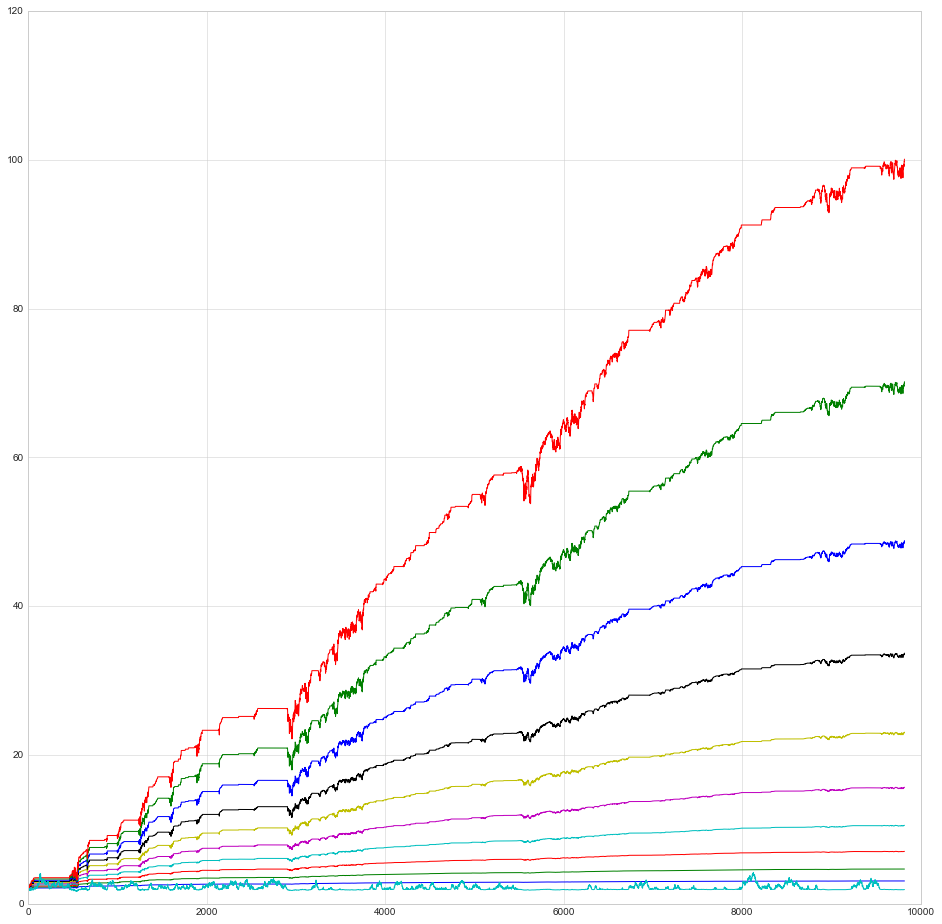

In [43]:
plt.figure(figsize=(16,16))
plt.plot(funds_wealth);

In [13]:
for i_episode in range(num_episodes):
    state = initial_state
    episode = []
    # One step in the environment
        for t in itertools.count():
            demand = 

array([1, 2, 2, 0, 0])

In [ ]:
class PolicyEstimator():
    """
    Policy Function approximator. Also called Actor.
    """
    
    def __init__(self, learning_rate=0.01, scope="policy_estimator"):
        with tf.variable_scope(scope):
            self.state = tf.placeholder(tf.float32, [400], "state")
            self.target = tf.placeholder(dtype=tf.float32, name="target")

            # This is just linear classifier
            self.mu = tf.contrib.layers.fully_connected(
                inputs=tf.expand_dims(self.state, 0),
                num_outputs=1,
                activation_fn=None,
                weights_initializer=tf.zeros_initializer)
            self.mu = tf.squeeze(self.mu)
            
            self.sigma = tf.contrib.layers.fully_connected(
                inputs=tf.expand_dims(self.state, 0),
                num_outputs=1,
                activation_fn=None,
                weights_initializer=tf.zeros_initializer)
            
            self.sigma = tf.squeeze(self.sigma)
            self.sigma = tf.nn.softplus(self.sigma) + 1e-5
            self.normal_dist = tf.contrib.distributions.Normal(self.mu,
                                                               self.sigma)
            self.demand = self.normal_dist._sample_n(1)
            self.demand = tf.clip_by_value(self.demand,
                                           env.demand_space.low[0],
                                           env.demand_space.high[0])

            # Loss and train op
            self.loss = -self.normal_dist.log_prob(self.demand) * self.target
            # Add cross entropy cost to encourage exploration
            self.loss -= 1e-1 * self.normal_dist.entropy()
            
            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            self.train_op = self.optimizer.minimize(
                self.loss, global_step=tf.contrib.framework.get_global_step())
    
    def predict(self, state, sess=None):
        sess = sess or tf.get_default_session()
        state = featurize_state(state)
        return sess.run(self.demand, { self.state: state })

    def update(self, state, target, demand, sess=None):
        sess = sess or tf.get_default_session()
        state = featurize_state(state)
        feed_dict = { self.state: state,
                      self.target: target,
                      self.demand: demand  }
        _, loss = sess.run([self.train_op, self.loss], feed_dict)
        return loss

In [ ]:
class ValueEstimator():
    """
    Value Function approximator. Also called Critic.
    """
    
    def __init__(self, learning_rate=0.1, scope="value_estimator"):
        with tf.variable_scope(scope):
            self.state = tf.placeholder(tf.float32, [400], "state")
            self.target = tf.placeholder(dtype=tf.float32, name="target")

            # This is just a linear classifier
            self.output_layer = tf.contrib.layers.fully_connected(
                inputs=tf.expand_dims(self.state, 0),
                num_outputs=1,
                activation_fn=None,
                weights_initializer=tf.zeros_initializer)

            self.value_estimate = tf.squeeze(self.output_layer)
            self.loss = tf.squared_difference(self.value_estimate, self.target)

            self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            self.train_op = self.optimizer.minimize(
                self.loss, global_step=tf.contrib.framework.get_global_step())        
    
    def predict(self, state, sess=None):
        sess = sess or tf.get_default_session()
        state = featurize_state(state)
        return sess.run(self.value_estimate, { self.state: state })

    def update(self, state, target, sess=None):
        sess = sess or tf.get_default_session()
        state = featurize_state(state)
        feed_dict = { self.state: state, self.target: target }
        _, loss = sess.run([self.train_op, self.loss], feed_dict)
        return loss

In [ ]:
def actor_critic(env, policy_estimator, value_estimator, num_episodes,
                 discount_factor=1.0):
    """
    Actor Critic Algorithm. Optimizes the policy 
    function approximator using policy gradient.
    
    Args:
        env: OpenAI environment.
        policy_estimator: Policy Function to be optimized 
        value_estimator: Value function approximator, used as a critic
        num_episodes: Number of episodes to run for
        discount_factor: Time-discount factor
    
    Returns:
        An EpisodeStats object with two numpy arrays for episode_lengths and
        episode_rewards.
    """
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))    
    
    Transition = collections.namedtuple("Transition", ["state", "action",
                                                       "reward", "next_state",
                                                       "done"])
    
    
    
    for i_episode in range(num_episodes):
        # Reset the environment and pick the first action
        # this is our initial state
        env.reset() 
        
        episode = []
        
        # One step in the environment
        for t in itertools.count():
            
            # get the demand function of the learning fund
            demand = policy_estimator.predict(state)
            
            # Simulate a step in the environment,
            # record the wealth of all funds in current_wealth
            current_wealth = env.step(funds)
            
            # record the current price and wealth of all funds
            prices.append(env.p_t)
            funds_wealth.append(current_wealth)
            
            # we assume one learning fund
            next_state = np.Array([env.p_t,
                                   learning_fund.get_wealth(self.p_t), 
                                   learning_fund.cash,
                                   learning_fund.shares,
                                   learning_fund.activation_delay]) 
            reward = ...
            
            # Keep track of the transition
            episode.append(Transition(
              state=state, action=action, reward=reward, next_state=next_state, done=done))
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # Calculate TD Target
            value_next = value_estimator.predict(next_state)
            td_target = reward + discount_factor * value_next
            td_error = td_target - value_estimator.predict(state)
            
            # Update the value estimator
            value_estimator.update(state, td_target)
            
            # Update the policy estimator
            # using the td error as our advantage estimate
            policy_estimator.update(state, td_error, action)
            
            # Print out which step we're on, useful for debugging.
            print("\rStep {} @ Episode {}/{} ({})".format(
                    t, i_episode + 1, num_episodes,
                    stats.episode_rewards[i_episode - 1]), end="")
            
            # env.done is True if one fund increases its wealth 50-fold
            if env.done:
                break
                
            state = next_state
    
    return stats

In [ ]:
prices = []
funds_wealth = []

# Create the environment
number_of_funds = 10
funds = [Fund((i+1)*5) for i in range(number_of_funds)]

learning_fund = LearningFund()
# add a LearningFund
funds.append(learning_fund)

# set initial situation
env = Env()


##############################################################################
# This works
tf.reset_default_graph()

global_step = tf.train.get_global_step()
policy_estimator = PolicyEstimator(learning_rate=0.001)
value_estimator = ValueEstimator(learning_rate=0.1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Due to randomness in the policy, the number of episodes you need varies
    # TODO: Sometimes the algorithm gets stuck, I'm not sure what exactly is
    # happening there.
    stats = actor_critic(env, policy_estimator, value_estimator,
                         num_episodes=50, discount_factor=0.95)